In [15]:
import numpy as np
#from torchsummary import summary
import pickle
import torch
import datetime
from torch.utils.tensorboard import SummaryWriter
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [2]:
f=open('./RawData/RAW_AllSubject_Training_Face_minmaxNorm','rb')
face_rawdata=pickle.load(f)

In [3]:
f=open('./RawData/RAW_AllSubject_Training_scramble_minmaxNorm','rb')
scramble_rawdata=pickle.load(f)

In [3]:
f=open('./RawData/FFT_AllSubject_Training_Face_minmaxNorm','rb')
face_FFTdata=pickle.load(f)

In [4]:
f=open('./RawData/FFT_AllSubject_Training_scramble_minmaxNorm','rb')
scrambleface_FFTdata=pickle.load(f)

In [6]:
face_result = np.zeros((1,3,102,375))
for l in range(len(face_rawdata)):
    face_rawdata[l]=np.where(face_rawdata[l]>1,1,face_rawdata[l])
    #totalsample+SummaryWriterhape[0]
    face_result = np.vstack((face_result,face_rawdata[l]))

In [ ]:
scramble_result = np.zeros((1,3,102,375))
for l in range(len(scramble_rawdata)):
    scramble_rawdata[l]=np.where(scramble_rawdata[l]>1,1,scramble_rawdata[l])
    #totalsample+SummaryWriterhape[0]
    scramble_result = np.vstack((scramble_result,scramble_rawdata[l]))

In [5]:
face_FFTresult = np.zeros((1,3,102,188))
for l in range(len(face_FFTdata)):
    face_FFTdata[l]=np.where(face_FFTdata[l]>1,1,face_FFTdata[l])
    #totalsample+SummaryWriterhape[0]
    face_FFTresult = np.vstack((face_FFTresult,face_FFTdata[l]))

In [6]:
scramble_FFTresult = np.zeros((1,3,102,188))
for l in range(len(scrambleface_FFTdata)):
    scrambleface_FFTdata[l]=np.where(scrambleface_FFTdata[l]>1,1,scrambleface_FFTdata[l])
    #totalsample+SummaryWriterhape[0]
    scramble_FFTresult = np.vstack((scramble_FFTresult,scrambleface_FFTdata[l]))

In [ ]:
face_result.min()

In [ ]:
result.shape

In [ ]:
fidx=np.random.choice(face_result.shape[0],11,replace=False)
sidx=np.random.choice(scramble_result.shape[0],11,replace=False)
fig,axes=plt.subplots(10,2,figsize=(30,30))
j=0
for (i,ax) in enumerate(axes.flat):
    if((i+1)%2==0):
        x=np.moveaxis(scramble_result[sidx[j]],0,-1)
        j+=1
    else:
        x=np.moveaxis(face_result[fidx[j]],0,-1)
    ax.imshow(x,interpolation='none')
#plt.savefig('./MEG_data_visualization1')

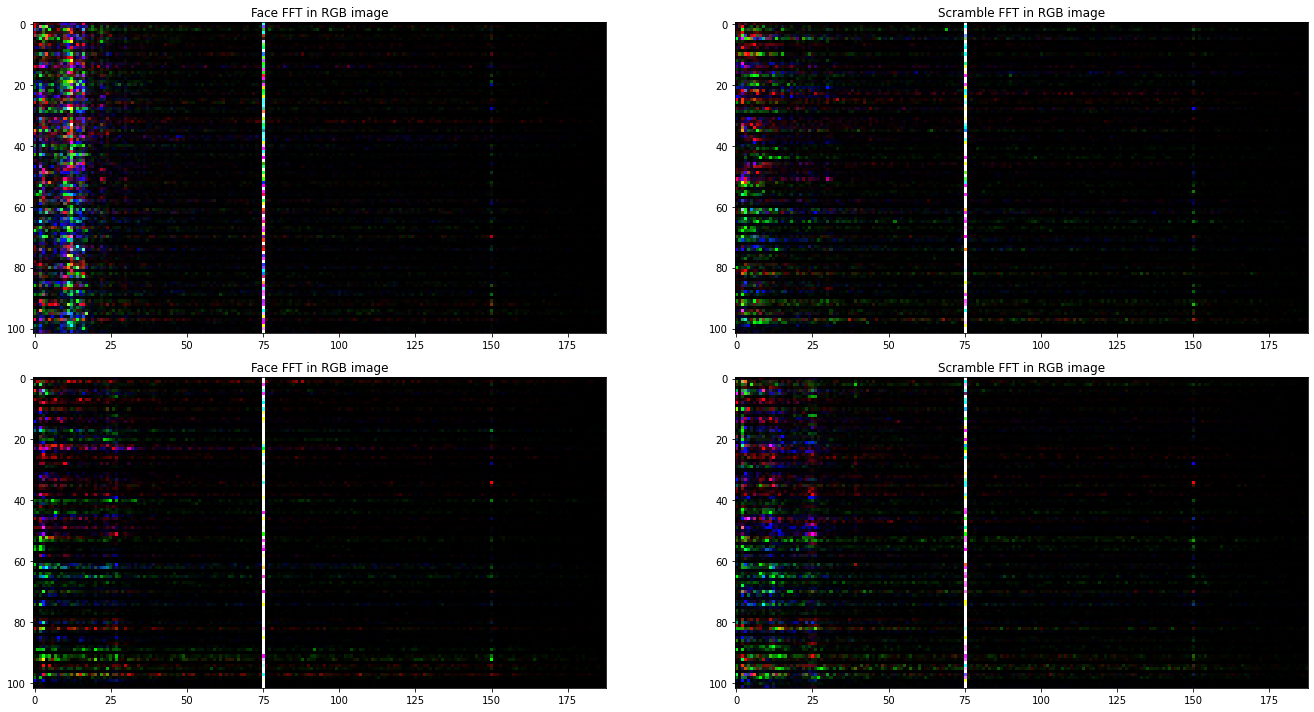

In [14]:
fidx=np.random.choice(face_FFTresult.shape[0],2,replace=False)
sidx=np.random.choice(scramble_FFTresult.shape[0],2,replace=False)
fig,axes=plt.subplots(2,2,figsize=(20,10))
j=0
for (i,ax) in enumerate(axes.flat):
    if((i+1)%2==0):
        ax.set_title('Scramble FFT in RGB image')
        x=np.moveaxis(scramble_FFTresult[sidx[j]],0,-1)
        j+=1
    else:
        ax.set_title('Face FFT in RGB image')
        x=np.moveaxis(face_FFTresult[fidx[j]],0,-1)
    ax.imshow(x,interpolation='none')
    ax.set_title
fig.tight_layout()
plt.savefig('./MEG_FFTdata_visualization_2RandomSample')

In [ ]:
face_FFTresult[2][:,:,75:76]
x=np.delete(face_FFTresult, 75, axis=3)

In [ ]:
x[2][:,:,74:75]

In [ ]:
face_FFTresult

In [17]:
face_FFTdata

[array([[[[4.72079064e-01, 5.61008530e-02, 6.57048627e-01, ...,
           9.08267100e-05, 1.00086550e-04, 3.50730225e-04],
          [3.23844505e-02, 3.04182640e-01, 1.00000000e+00, ...,
           1.48877151e-03, 3.28248726e-03, 3.66138430e-03],
          [4.96091207e-01, 3.00786870e-02, 4.62404551e-01, ...,
           8.35364781e-03, 7.41579673e-04, 9.60871338e-03],
          ...,
          [3.54224663e-03, 8.05366276e-04, 2.73764475e-02, ...,
           1.39483555e-05, 1.21504718e-04, 6.70104479e-05],
          [1.17900989e-03, 9.02765724e-04, 1.95789349e-02, ...,
           5.44007862e-04, 9.26822163e-05, 5.58313588e-04],
          [1.59574361e-03, 7.90301866e-03, 1.61181220e-01, ...,
           2.14562839e-04, 2.33065433e-04, 1.16173535e-05]],
 
         [[6.18796708e-03, 1.05747368e-02, 1.72313477e-02, ...,
           9.46248547e-05, 1.79314608e-04, 1.77559318e-04],
          [3.96607572e-02, 1.48036198e-02, 5.38826054e-01, ...,
           1.70447843e-03, 7.93318681e-03, 3.45068